# Digit Classification using Support Vector Machine (SVM)

This script uses the built-in sklearn digits dataset to classify handwritten digits (0-9) using different SVM kernels. It includes data loading, visualization, model training prediction on a sample image, and accuracy evaluation for each model.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [10]:
# Load the digit dataset
def load_data():
    dataset = load_digits()
    return dataset.data, dataset.target, dataset.images

In [11]:
# Visualize a single digit image
def visualize_image(image):
    plt.gray()
    plt.matshow(image)
    plt.axis('off')
    plt.show()

In [12]:
# Train an SVM model using a specified kernel
def train_model(X_train, y_train, kernel='linear', gamma=0.001, C=1.0):
    if kernel == 'linear':
        model = svm.SVC(kernel='linear')
    elif kernel == 'rbf':
        model = svm.SVC(kernel='rbf', gamma=gamma)
    elif kernel == 'rbf_gamma':
        model = svm.SVC(kernel='rbf', gamma=0.005)
    elif kernel == 'rbf_gamma_C':
        model = svm.SVC(kernel='rbf', gamma=0.005, C=10.0)
    else:
        raise ValueError("Unsupported kernel type")
    model.fit(X_train, y_train)
    return model

In [13]:
# Predict and visualize a digit using the trained model
def predict_image(model, image):
    result = model.predict(image.reshape(1, -1))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title(f"Predicted Digit: {result[0]}")
    plt.show()

In [14]:
# Evaluate model accuracy on test data
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the Model: {accuracy * 100:.2f}%")

<Figure size 640x480 with 0 Axes>

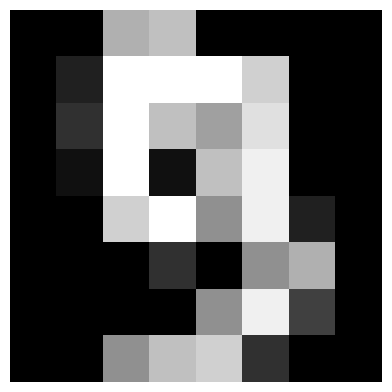

Accuracy of linear kernel: Accuracy of the Model: 97.11%
Accuracy of rbf kernel: Accuracy of the Model: 99.56%
Accuracy of rbf_gamma kernel: Accuracy of the Model: 97.11%
Accuracy of rbf_gamma_C kernel: Accuracy of the Model: 97.33%


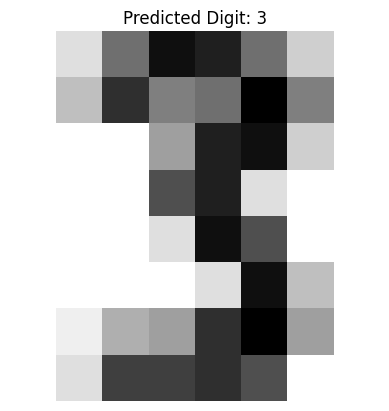

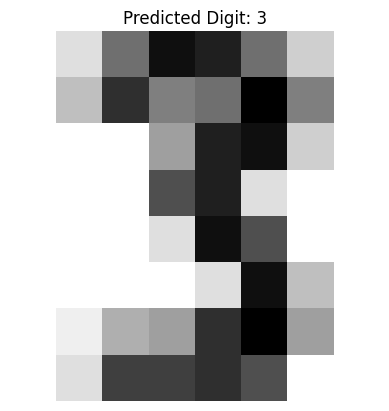

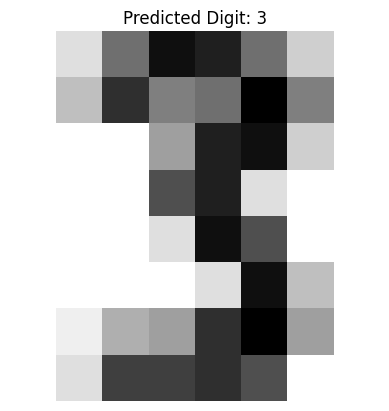

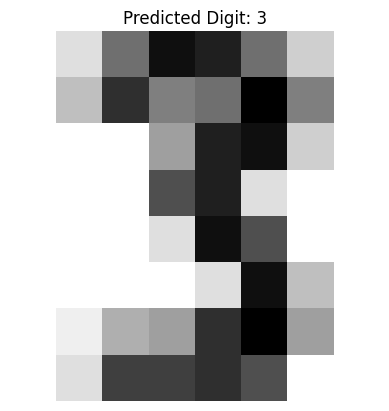

In [15]:
# Main logic
if __name__ == '__main__':
    # Load data and show a sample image
    X, y, images = load_data()
    visualize_image(images[9])

    # Flatten images into 1D feature vectors
    X_flat = X.reshape(len(images), -1)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.25, random_state=0)

    # Train models with different kernel settings
    kernels = ['linear', 'rbf', 'rbf_gamma', 'rbf_gamma_C']
    models = [train_model(X_train, y_train, kernel=k) for k in kernels]

    # Evaluate each model
    for kernel, model in zip(kernels, models):
        print(f"Accuracy of {kernel} kernel: ", end="")
        evaluate_model(model, X_test, y_test)

    # Predict and visualize a digit with each model
    for model in models:
        predict_image(model, images[13])